<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Model evaluation - Precision case

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Random Forest Classifier](#section4)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using accuracy score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br>
    - 5.3 [Model evaluation using precision score](#section503)<br>
    - 5.4 [Model evaluation using recall score](#section504)<br>
    - 5.5 [Model evaluation using f1_score](#section505)<br>
    - 5.6 [Model evaluation using ROC_AUC curve](#section506)<br>
    - 5.7 [Choosing better model using precision score](#section507)<br>

<a id = section1></a>

## 1. Problem Statement

Given the dataset containing __personal details of citizens__, make a model to predict whether people will commit crime in future or not using random forest algorithm. Evaluate the model using possible __model evaluation techniques__. 

<a id = section2></a>

## 2. Data Loading and Description

Courts are based on the principle that says "__it is better 100 guilty Persons should escape than that one innocent Person should suffer__". You are given a dataset containing answers to various questions concerning the professional and private lives of several people. A few of them have been arrested for various small and large crimes in the past. Use the given data to make a model for the court to predict if the convict is guilty or not.
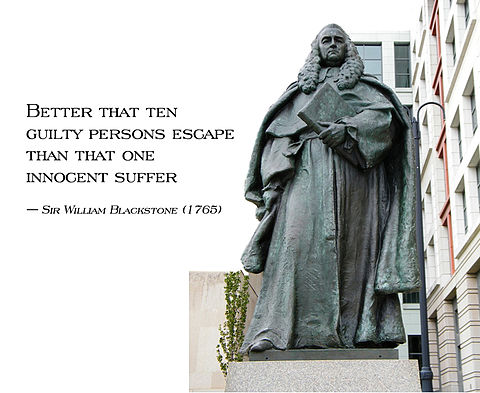
- __False positive__ - model predict a convict to be guilty but actually he isnt. 
- __False negative__ - model predict a convict to be innocent but the person would be guilty.

So, based on the principle of court, __false positives minimisation__ is the main aim.
The dataset consists of __45718 rows__.<br/>
Below is a table having brief description of features present in the dataset.



|Feature    |	Description                                               |
|-----------| ------------                                                | 
|PERID	    |        Person ID                                            |
| IFATHER   | 	FATHER IN HOUSEHOLD                                       |
| NRCH17_2  | 	RECODED # R's CHILDREN &lt; 18 IN HOUSEHOLD               |
| RHHSIZ2	| RECODE - IMPUTATION-REVISED # PERSONS IN HH                 |
| IIHHSIZ2	| IMPUTATION INDICATOR                                        |
| IRKI17_2	| IMPUTATION-REVISED # KIDS AGED&lt;18 IN HH                  |   
| IIKI17_2  |  IRKI17_2-IMPUTATION INDICATOR                              | 
| IRHH65_2  | 	REC - IMPUTATION-REVISED # OF PER IN HH AGED&gt;=65       |
| IIHH65_2  | 	IRHH65_2-IMPUTATION INDICATOR                             |
| PRXRETRY	| SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?          | 
| PRXYDATA	| IS PROXY ANSWERING INSURANCE/INCOME QS                      |
| MEDICARE	| COVERED BY MEDICARE                                         |
| CAIDCHIP	| COVERED BY MEDICAID/CHIP                                    |
| CHAMPUS	| COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY              |
| PRVHLTIN	| COVERED BY PRIVATE INSURANCE                                |
| GRPHLTIN	| PRIVATE PLAN OFFERED THROUGH EMPLOYER OR UNION              |
| HLTINNOS	| COVERED BY HEALTH INSUR                                     |
| HLCNOTYR  | ANYTIME DID NOT HAVE HEALTH INS/COVER PAST 12 MOS           |
| HLCNOTMO  | 	PAST 12 MOS, HOW MANY MOS W/O COVERAGE                    |
| HLCLAST	| TIME SINCE LAST HAD HEALTH CARE COVERAGE                    |
| HLLOSRSN	| MAIN REASON STOPPED COVERED BY HEALTH INSURANCE             |
| HLNVCOST  | 	COST TOO HIGH                                             |
| HLNVOFFR	| EMPLOYER DOESN'T OFFER                                      |
| HLNVREF	| INSURANCE COMPANY REFUSED COVERAGE                          |
| HLNVNEED  | 	DON'T NEED IT                                             |
| HLNVSOR   | 	NEVER HAD HLTH INS SOME OTHER REASON                      |
| IRMCDCHP  | 	IMPUTATION REVISED CAIDCHIP                               |
| IIMCDCHP	| MEDICAID/CHIP - IMPUTATION INDICATOR                        |
| IRMEDICR	| MEDICARE - IMPUTATION REVISED                               |
| IIMEDICR	| MEDICARE - IMPUTATION INDICATOR                             |
| IRCHMPUS	| CHAMPUS - IMPUTATION REVISED                                |
| IICHMPUS	| CHAMPUS - IMPUTATION INDICATOR                              |
| IRPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION REVISED               |
| IIPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION INDICATOR             |
| IROTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION REVISED                 |
| IIOTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION INDICATOR               |
| HLCALLFG	| FLAG IF EVERY FORM OF HEALTH INS REPORTED                   |
| HLCALL99	| YES TO MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN                   |
| ANYHLTI2	| COVERED BY ANY HEALTH INSURANCE - RECODE                    |
| IRINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION REVISED            |
| IIINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION INDICATOR          |
| OTHINS	| RC-OTHER HEALTH INSURANCE                                   |
| CELLNOTCL	| NOT A CELL PHONE                                            |
| CELLWRKNG | WORKING CELL PHONE                                          |
| IRFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION REVISED          |
| IIFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION INDICATOR        |
| IRFAMSSI	| FAM RECEIVE SSI - IMPUTATION REVISED                        |
| IIFAMSSI	| FAM RECEIVE SSI - IMPUTATION INDICATOR                      |
| IRFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION REVISED       |
| IIFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION INDICATOR     |
| IRFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION REVISED              |
| IIFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION INDICATOR            |
| IRFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION REVISED       |
| IIFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION INDICATOR     |
| IRWELMOS	| IMP. REVISED - NO.OF MONTHS ON WELFARE                      |
| IIWELMOS	| NO OF MONTHS ON WELFARE - IMPUTATION INDICATOR              |
| IRPINC3	| RESP TOT INCOME (FINER CAT) - IMP REV                       |
| IRFAMIN3  | RECODE - IMP.REVISED - TOT FAM INCOME                       |
| IIPINC3	| RESP TOT INCOME (FINER CAT) - IMP INDIC                     |
| IIFAMIN3	| IRFAMIN3 - IMPUTATION INDICATOR                             |
| GOVTPROG  | RC-PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS         |
| POVERTY3	| RC-POVERTY LEVEL                                            |
| TOOLONG	| RESP SAID INTERVIEW WAS TOO LONG                            |
| TROUBUND	| DID RESP HAVE TROUBLE UNDERSTANDING INTERVIEW               |
| PDEN10	| POPULATION DENSITY 2010                                     |
| COUTYP2	| COUNTY METRO/NONMETRO STATUS                                |
| MAIIN102	| MAJORITY AMER INDIAN AREA INDICATOR FOR SEGMENT             |
| AIIND102	| AMER INDIAN AREA INDICATOR                                  |
| ANALWT_C	| FIN PRSN-LEVEL SIMPLE WGHT                                  |
| VESTR    	| ANALYSIS STRATUM                                            |
| VEREP	    | ANALYSIS REPLICATE                                          |
| Criminal	| Target Variable                                             |

__Importing Packages__

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Importing the Dataset

In [2]:
crime = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/criminal_train.csv')
crime.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


<a id = section3></a>

## 3. Exploratory Data Analysis

#### Check the shape of the dataset

In [3]:
crime.shape

(45718, 72)

#### Check the columns present in the dataset

In [4]:
crime.columns

Index(['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2',
       'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
       'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI',
       'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
       'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',
       'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP',
       'Criminal'],
      dtype='object')

#### Check the descriptive statistics of the dataset

In [5]:
crime.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,...,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,...,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,...,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1252.396472,40013.000000,1.000000,0.000000
50%,5.411043e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2719.335160,40025.000000,1.000000,0.000000
75%,7.612731e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5765.810794,40039.000000,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,109100.623000,40050.000000,2.000000,1.000000


#### Check the info of the dataset

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
PERID        45718 non-null int64
IFATHER      45718 non-null int64
NRCH17_2     45718 non-null int64
IRHHSIZ2     45718 non-null int64
IIHHSIZ2     45718 non-null int64
IRKI17_2     45718 non-null int64
IIKI17_2     45718 non-null int64
IRHH65_2     45718 non-null int64
IIHH65_2     45718 non-null int64
PRXRETRY     45718 non-null int64
PRXYDATA     45718 non-null int64
MEDICARE     45718 non-null int64
CAIDCHIP     45718 non-null int64
CHAMPUS      45718 non-null int64
PRVHLTIN     45718 non-null int64
GRPHLTIN     45718 non-null int64
HLTINNOS     45718 non-null int64
HLCNOTYR     45718 non-null int64
HLCNOTMO     45718 non-null int64
HLCLAST      45718 non-null int64
HLLOSRSN     45718 non-null int64
HLNVCOST     45718 non-null int64
HLNVOFFR     45718 non-null int64
HLNVREF      45718 non-null int64
HLNVNEED     45718 non-null int64
HLNVSOR      45718 non-null int64
IRMCDCH

#### Check the missing values present in the dataset. 

In [7]:
crime.isnull().sum()

PERID       0
IFATHER     0
NRCH17_2    0
IRHHSIZ2    0
IIHHSIZ2    0
           ..
AIIND102    0
ANALWT_C    0
VESTR       0
VEREP       0
Criminal    0
Length: 72, dtype: int64

<a id = section4></a>

## 4. Random Forest Classifier

#### Preparing X and y using pandas

In [8]:
X = crime.drop(['Criminal'], axis=1)
X.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,25095143,4,2,4,1,3,1,1,1,99,...,2,1,2,1,1,2,2,3884.805998,40026,1
1,13005143,4,1,3,1,2,1,1,1,99,...,1,2,2,2,3,2,2,1627.108106,40015,2
2,67415143,4,1,2,1,2,1,1,1,99,...,1,2,2,2,3,2,2,4344.957980,40024,1
3,70925143,4,0,2,1,1,1,1,1,99,...,3,2,2,1,1,2,2,792.521931,40027,1
4,75235143,1,0,6,1,4,1,1,1,99,...,1,2,2,2,2,2,2,1518.118526,40001,2


In [9]:
y = crime["Criminal"]

####  Spliting X and y into train and test dataset.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Checking the shape of X and y of train dataset

In [11]:
print(X_train.shape)
print(y_train.shape)

(34288, 71)
(34288,)


#### Checking the shape of X and y of test dataset

In [12]:
print(X_test.shape)
print(y_test.shape)

(11430, 71)
(11430,)


Now, we are going to make 2 models one without any parameter specification and in other we will specify some parameter values. Then in later sections we will compare the performance of these models using various model evaluation techniques.

#### Instantiating Random Forest Classifier using scikit learn with default parameters.

In [13]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

#### Instantiating Random Forest Classifier using scikit learn with:
- random_state = 0,
- max_depth = 5, 
- min_samples_leaf = 5,
- min_samples_split = 7,
- min_weight_fraction_leaf = 0.0,
- n_estimators = 12, 
- n_jobs = -1

In [14]:
model2 = RandomForestClassifier(
                                random_state = 0,
                                max_depth = 5, 
                                min_samples_leaf = 5,
                                min_samples_split = 7,
                                min_weight_fraction_leaf = 0.0,
                                n_estimators = 12, 
                                n_jobs = -1,
                                ) 

#### Fitting the model on X_train and y_train

In [15]:
model1.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Using the model for prediction

In [17]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [18]:
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

<a id = section5></a>

## 5. Model evaluation 

<a id = section501></a>

### 5.1 Model evaluation using accuracy score

In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.9425196850393701
Accuracy score for test data with model 2 is: 0.9301837270341208


__Accuracy score__ of model1 is slightly greater than that of model2.<br/>
Lets see some other evaluation techniques, to compare the two models.

<a id = section502></a>

### 5.2 Model evaluation using confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 1 is:
 [[10408   218]
 [  439   365]]
Confusion matrix for test data with model 2 is:
 [[10626     0]
 [  798     6]]


Comparing confusion matrix for the two models: 
- No. of __False negative__ cases are __more__ in model2
- No. of __False positive__ cases are __0__ in model2

Calculating Recall and precision score for a clearer picture of the scenario.

<a id = section503></a>

### 5.3. Model evaluation using precision score

In [21]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2)
print('Precision score for test data using model2 is:', precision2)


Precision score for test data using model1 is: 0.6260720411663808
Precision score for test data using model2 is: 1.0


__Precision score for model2 is 1__. This means that no innocent is convicted as guilty. Thats what the foundation of law.

<a id = section504></a>

### 5.4 Model evaluation using recall score

In [22]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,prediction1))   
print('Recall score for test data using model2 is:',recall_score(y_test,prediction2))

Recall score for test data using model1 is: 0.4539800995024876
Recall score for test data using model2 is: 0.007462686567164179


Recall score of model1 is higher than that of model2.

<a id = section505></a>

### 5.5 Model evaluation using F1_score

In [23]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2))

F1_score for test data using model1 is: 0.5263157894736843
F1_score for test data using model2 is: 0.014814814814814815


F1_score for __model1__ is much __higher__ than that of model 2, but we need to take decision on the basis of Precision Score.

<a id = section506a>

### 5.6 Model evaluation using ROC_AUC curve
- For model1

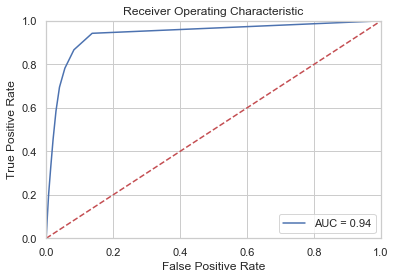

In [24]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- For model2

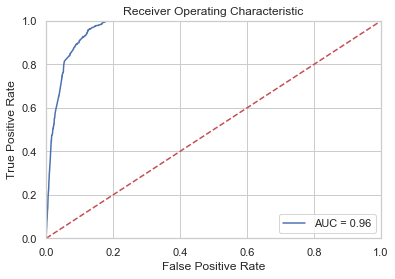

In [25]:
from sklearn import metrics
probs = model2.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observing the ROC-AUC curve for both the models, __AUC score of model2 is higher than model1.__

<a id = section5.7></a>

### 5.7 Choosing better model using precision score

We have compared the performance of the two models using various model evaluation techinques.<br/>
Our objective is to __minimize False Positive__ so that no innocent is convicted as guilty. Therefore, among recall & precision scores, we will give more importance to __precision score__.


- Precision score for model1 is: __0.62__
- Precision score for model2 is: __1__

As __precision score of model2 is greater__ than that of model1, therefore, __model2 is preferable.__ 